In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

from data_generator import DataGenerator

In [3]:
label_name = {}
for index, folder in enumerate(os.listdir(f'data/train')):
    label_name[folder] = index-1

In [4]:
test_paths = np.array([])
test_labels = {}
for folder in os.listdir('data/test'):
    for file in os.listdir(f'data/test/{folder}'):
        # required due to .DS_Store
        if file[0] == '.':
            continue
        test_paths = np.append(test_paths, np.array([f'data/test/{folder}/{file}']))
        test_labels[f'data/test/{folder}/{file}'] = label_name[folder]

In [32]:
test_generator = DataGenerator(test_paths, test_labels, batch_size=30, shuffle=False)

In [6]:
model_without_maxpooling = load_model(r'models/2.h5')

In [7]:
model_with_maxpooling = load_model(r'models/2_max_pooling.h5')

In [8]:
model_without_maxpooling.evaluate(test_generator)

250/250 [==============================] - 19s 59ms/step - loss: 0.0125 - accuracy: 0.9969


[0.012499535456299782, 0.9969333410263062]

In [9]:
model_with_maxpooling.evaluate(test_generator)

250/250 [==============================] - 14s 53ms/step - loss: 0.0124 - accuracy: 0.9963


[0.012372310273349285, 0.9962666630744934]

The model which uses convolutional layers has 00.06% points higher accuracy. It's cause convolutional layer can learn how to pool image for certain problem. The model which uses max pooling is faster to learn and has fewer parameters - with many max pooling layers it can be important.

In [17]:
labels = []
for d, l in test_generator:
    labels.append(l)

In [20]:
labels = np.array(labels)
labels = np.reshape(labels, (labels.shape[0]*labels.shape[1],labels.shape[2]))

In [24]:
actual_value = np.argmax(labels, axis=1)

In [45]:
predicted = np.argmax(model_without_maxpooling.predict(test_generator), axis=1)

250/250 [==============================] - 17s 66ms/step


In [37]:
print(classification_report(actual_value, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1500
           2       0.99      1.00      0.99      1500
           3       1.00      1.00      1.00      1500
           4       0.99      0.99      0.99      1500

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



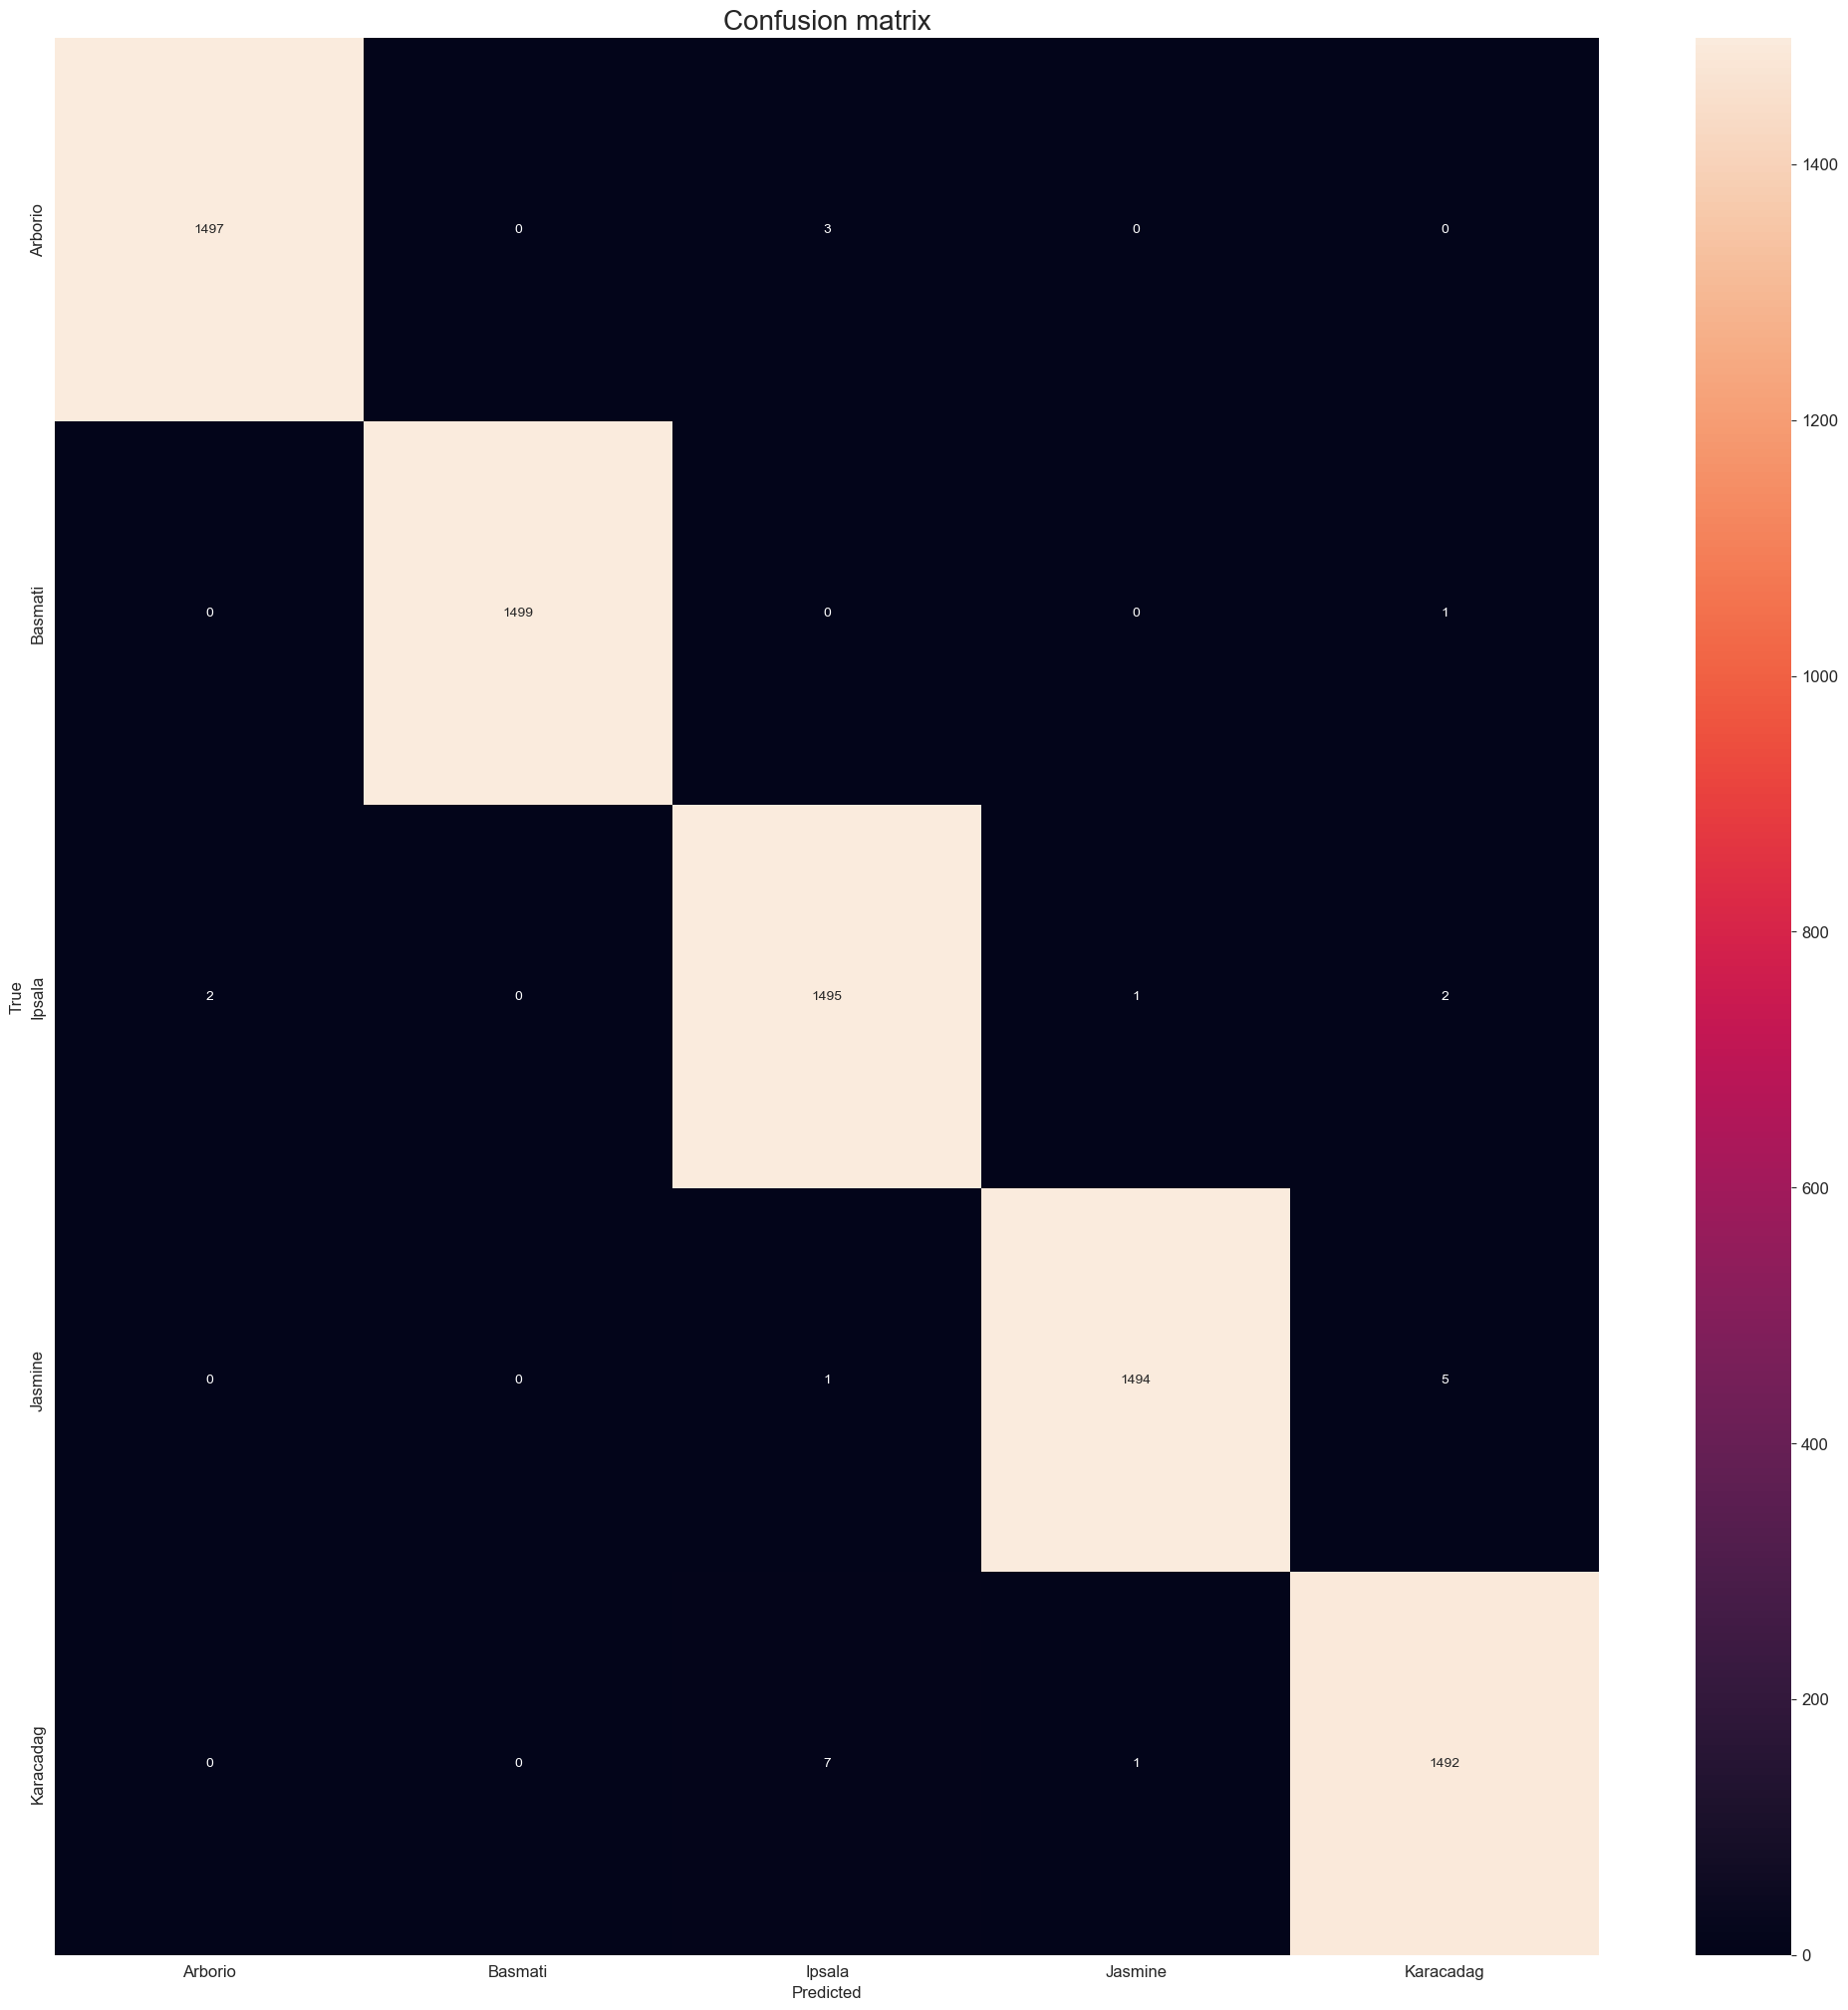

In [47]:
cm = confusion_matrix(actual_value, predicted)
cm_df = pd.DataFrame(cm,
                     index=os.listdir(r'data/test'),
                     columns=os.listdir(r'data/test'))

fig = plt.figure(figsize=(25, 25))
sns.heatmap(cm_df, annot=True, fmt=".10g")
plt.rc("font", size=10)
plt.rc("axes", titlesize=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=1)
plt.title("Confusion matrix", fontsize=20)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

In [38]:
predicted = model_with_maxpooling.predict(test_generator)

250/250 [==============================] - 15s 60ms/step


In [39]:
predicted = np.argmax(predicted, axis=1)

In [40]:
print(classification_report(actual_value, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1500
           1       1.00      1.00      1.00      1500
           2       0.99      1.00      0.99      1500
           3       1.00      1.00      1.00      1500
           4       0.99      1.00      0.99      1500

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [41]:
cm = confusion_matrix(actual_value, predicted)

In [42]:
cm_df = pd.DataFrame(cm,
                     index=os.listdir(r'data/test'),
                     columns=os.listdir(r'data/test'))

In [ ]:
fig = plt.figure(figsize=(25,25))
sns.heatmap(cm_df, annot=True, fmt=".10g")
plt.rc("font", size=40)
plt.rc("axes", titlesize=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=1)
plt.title("Confusion matrix", fontsize=20)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

There are some bad predicted images, but that is only small amount - almost meaningless.